<a href="https://colab.research.google.com/github/kdChen07/progress-and-problems/blob/main/LSCP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install pulp

In [1]:
import numpy
import geopandas
import pandas
import pulp
from shapely.geometry import Point
import matplotlib.pyplot as plt
from google.colab import files
from shapely import wkt

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/spopt-gsoc21-facloc

/content/drive/MyDrive/Colab Notebooks/spopt-gsoc21-facloc


In [ ]:
!python setup.py install

In [2]:
MSOA=pandas.read_csv('https://github.com/kdChen07/progress-and-problems/blob/main/data/MSOA6408.csv?raw=ture')
#demand_points = demand_points.to_crs('epsg:4326')

In [3]:
MSOA['geometry'] = MSOA['geometry'].apply(wkt.loads)
demand_points = geopandas.GeoDataFrame(MSOA, geometry='geometry')
demand_points.crs = 'epsg:27700'

In [4]:
demand_points = demand_points.to_crs('epsg:4326')

In [5]:
demand_points['point_lon'] = demand_points['geometry'].x
demand_points['point_lat'] = demand_points['geometry'].y

In [6]:
display(demand_points)

,msoa11cd,geometry,point_lon,point_lat
0,E02002536,POINT (-1.29577 54.61069),-1.295773,54.610691
1,E02002537,POINT (-1.27726 54.61131),-1.277263,54.611313
2,E02002534,POINT (-1.05346 54.52765),-1.053458,54.527646
3,E02002535,POINT (-1.28729 54.62215),-1.287295,54.622148
4,E02002532,POINT (-1.05793 54.53718),-1.057931,54.537176
...,...,...,...,...
6403,E02006086,POINT (-2.65042 50.95291),-2.650420,50.952914
6404,E02004256,POINT (-2.26595 51.03320),-2.265954,51.033202
6405,E02004669,POINT (-2.09642 51.94596),-2.096424,51.945960
6406,E02006070,POINT (-2.97724 51.12711),-2.977239,51.127113


In [7]:
facility_points = geopandas.read_file('https://github.com/LingruFeng/dissertation/blob/main/data_github/site_2_26_clean/vaccination_site.gpkg?raw=true')
facility_points = facility_points.to_crs('epsg:4326')

In [8]:
facility_points['point_lon'] = facility_points['geometry'].x
facility_points['point_lat'] = facility_points['geometry'].y

In [9]:
facility_points

,index,supply_value,geometry,point_lon,point_lat
0,0,1,POINT (-0.47121 52.12862),-0.471211,52.128622
1,1,1,POINT (-0.47464 51.89479),-0.474637,51.894793
2,2,1,POINT (-0.09377 51.46806),-0.093771,51.468063
3,3,1,POINT (-0.09377 51.46806),-0.093771,51.468063
4,4,1,POINT (-0.48437 51.89181),-0.484367,51.891807
...,...,...,...,...,...
1595,1595,1,POINT (-4.86582 50.51595),-4.865818,50.515949
1596,1596,1,POINT (-0.20584 51.43344),-0.205835,51.433441
1597,1597,1,POINT (-0.17383 51.51486),-0.173830,51.514861
1598,1598,1,POINT (-1.87917 50.71691),-1.879170,50.716914


In [12]:
network_distance = pandas.read_csv('https://github.com/kdChen07/progress-and-problems/blob/main/data/distance370000.csv?raw=ture')
network_distance

,Distance in meter,origin_id,destination_id
0,0.0,E02006875,1320
1,10.0,E02000978,958
2,11.3,E02006931,1371
3,12.6,E02000119,830
4,32.4,E02000870,1243
...,...,...,...
373305,16093.1,E02000535,1023
373306,16093.2,E02000405,1055
373307,16093.3,E02000218,223
373308,16093.3,E02000347,180


In [13]:
tract = geopandas.read_file('https://github.com/LingruFeng/dissertation/blob/main/data_github/England_basemap/MSOA_Boundary_with_population.gpkg?raw=true')
tract = tract.to_crs('epsg:4326')

In [14]:
ntw_dist_piv = network_distance.pivot_table(values="Distance in meter", index="origin_id", columns="destination_id")
ntw_dist_piv

destination_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
origin_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
E02000001,NaN,NaN,7737.2,7737.2,NaN,NaN,NaN,NaN,6538.4,6644.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1444.8,15545.0,NaN,NaN,NaN,6322.0,NaN,2906.3,NaN,14657.6,4323.5,10096.4,2323.2,6322.0,9330.4,5888.0,3390.6,1444.8,12426.3,...,13226.9,6965.6,NaN,NaN,NaN,NaN,8929.9,NaN,NaN,NaN,5122.6,4375.7,NaN,4302.6,NaN,NaN,NaN,NaN,NaN,2906.3,NaN,6353.3,3220.0,3186.8,NaN,NaN,NaN,NaN,1287.2,13474.3,NaN,NaN,NaN,NaN,8376.2,NaN,15437.6,8267.6,NaN,NaN
E02000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11051.8,NaN,3296.5,3296.5,16050.6,9116.4,NaN,NaN,11481.8,NaN,14198.6,NaN,16050.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15163.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6961.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E02000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11436.6,NaN,3681.4,3681.4,NaN,7553.4,NaN,NaN,11866.7,NaN,12635.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13600.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5281.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E02000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15618.3,NaN,7863.0,7863.0,NaN,7132.1,NaN,NaN,16048.3,NaN,14162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15127.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8775.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E02000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15131.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12959.2,NaN,5203.9,5203.9,NaN,7247.0,NaN,NaN,13389.2,NaN,11231.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12197.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5479.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E02006930,NaN,NaN,8983.8,8983.8,NaN,NaN,NaN,NaN,5482.1,15682.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10298.8,15210.0,NaN,NaN,NaN,9686.0,NaN,7835.3,14544.2,14322.6,7640.3,7703.3,11026.4,9686.0,15304.1,14925.4,12488.4,10298.8,NaN,...,NaN,16003.0,NaN,NaN,NaN,NaN,6536.7,NaN,NaN,NaN,8854.4,12488.5,NaN,12266.3,NaN,NaN,NaN,NaN,NaN,7835.3,NaN,15390.7,12257.4,11184.5,NaN,14925.6,NaN,NaN,9237.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E02006931,NaN,NaN,6829.9,6829.9,NaN,NaN,NaN,NaN,7435.2,13020.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10479.0,NaN,NaN,NaN,NaN,11639.2,NaN,9788.4,12137.9,NaN,9593.5,9656.4,9939.0,11639.2,NaN,13525.3,11346.3,10479.0,NaN,...,NaN,12855.3,NaN,NaN,NaN,NaN,8489.9,NaN,NaN,NaN,6700.6,10334.7,NaN,10112.4,NaN,NaN,NaN,NaN,NaN,9788.4,NaN,13544.8,12254.2,13137.6,NaN,NaN,NaN,NaN,9596.6,NaN,NaN,NaN,NaN,NaN,14672.0,NaN,NaN,14248.6,NaN,NaN
E02006932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
cost_matrix = ntw_dist_piv.to_numpy()
cost_matrix

array([[   nan,    nan, 7737.2, ..., 8267.6,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan]])

In [16]:
cost_matrix[numpy.isnan(cost_matrix)] = 20000

In [17]:
cost_matrix

array([[20000. , 20000. ,  7737.2, ...,  8267.6, 20000. , 20000. ],
       [20000. , 20000. , 20000. , ..., 20000. , 20000. , 20000. ],
       [20000. , 20000. , 20000. , ..., 20000. , 20000. , 20000. ],
       ...,
       [20000. , 20000. , 20000. , ..., 20000. , 20000. , 20000. ],
       [20000. , 20000. , 20000. , ..., 20000. , 20000. , 20000. ],
       [20000. , 20000. , 20000. , ..., 20000. , 20000. , 20000. ]])

In [18]:
facility_points_gdf = geopandas.GeoDataFrame(
    facility_points,
    geometry = geopandas.points_from_xy(
        facility_points.point_lon, facility_points.point_lat
    ),
).sort_values(by=['index']).reset_index()

demand_points_gdf = geopandas.GeoDataFrame(
    demand_points,
    geometry=geopandas.points_from_xy(demand_points.point_lon, demand_points.point_lat),
).sort_values(by=['msoa11cd']).reset_index()

In [19]:
facility_points_gdf

,level_0,index,supply_value,geometry,point_lon,point_lat
0,0,0,1,POINT (-0.47121 52.12862),-0.471211,52.128622
1,1,1,1,POINT (-0.47464 51.89479),-0.474637,51.894793
2,2,2,1,POINT (-0.09377 51.46806),-0.093771,51.468063
3,3,3,1,POINT (-0.09377 51.46806),-0.093771,51.468063
4,4,4,1,POINT (-0.48437 51.89181),-0.484367,51.891807
...,...,...,...,...,...,...
1595,1595,1595,1,POINT (-4.86582 50.51595),-4.865818,50.515949
1596,1596,1596,1,POINT (-0.20584 51.43344),-0.205835,51.433441
1597,1597,1597,1,POINT (-0.17383 51.51486),-0.173830,51.514861
1598,1598,1598,1,POINT (-1.87917 50.71691),-1.879170,50.716914


In [20]:
demand_points_gdf

,index,msoa11cd,geometry,point_lon,point_lat
0,4532,E02000001,POINT (-0.09499 51.51952),-0.094986,51.519522
1,4526,E02000002,POINT (0.13436 51.58398),0.134360,51.583983
2,4528,E02000003,POINT (0.13963 51.57220),0.139632,51.572205
3,4522,E02000004,POINT (0.17742 51.56050),0.177421,51.560500
4,4524,E02000005,POINT (0.14337 51.56049),0.143366,51.560490
...,...,...,...,...,...
6403,4063,E02006930,POINT (0.01019 51.48538),0.010193,51.485384
6404,4064,E02006931,POINT (-0.01364 51.47453),-0.013639,51.474526
6405,493,E02006932,POINT (-2.97709 53.40640),-2.977089,53.406397
6406,496,E02006933,POINT (-2.98448 53.39740),-2.984482,53.397401


In [21]:
service_dist = 16093.44

In [22]:
from matplotlib.patches import Patch
import matplotlib.lines as mlines

dv_colors = [
    "darkcyan",
    "mediumseagreen",
    "cyan",
    "darkslategray",
    "lightskyblue",
    "limegreen",
    "darkgoldenrod",
    "peachpuff",
    "coral",
    "mediumvioletred",
    "blueviolet",
    "fuchsia",
    "thistle",
    "lavender",
    "saddlebrown",
] 

def plot_results(model, facility_points_gdf, demand_points_gdf, facility_count, title):
    arr_points = []
    fac_sites = []
    
    for i in range(facility_count):
        if model.fac2cli[i]:
            geom = demand_points_gdf.iloc[model.fac2cli[i]]['geometry']
            arr_points.append(geom)
            fac_sites.append(i)

    fig, ax = plt.subplots(figsize=(18,18))
    legend_elements = []

    tract.plot(ax=ax, alpha=1, color='tan', zorder=1)
    legend_elements.append(mlines.Line2D(
        [],
        [],
        color='tan',
        label='tract',
    ))

    facility_points_gdf.plot(ax=ax, color='brown', marker="*", markersize=20, zorder=2)
    legend_elements.append(mlines.Line2D(
        [],
        [],
        color='brown',
        marker="*",
        linewidth=0,
        label=f'facility sites ($n$={facility_count})'
    ))

    demand_points_gdf.plot(ax=ax, edgecolor='k', color='white',markersize=5, zorder=2)
    legend_elements.append(mlines.Line2D(
        [],
        [],
        color='white',
        marker="o",
        markeredgecolor='k',
        linewidth=0,
        label=f'clients not covered'
    ))
 
    for i in range(len(arr_points)):
        gdf = geopandas.GeoDataFrame(arr_points[i])
        label = f"points covered by {facility_points_gdf.iloc[[fac_sites[i]]]['index'].squeeze()}"
        #legend_elements.append(Patch(facecolor=dv_colors[1], edgecolor="k", label=label))

        gdf.plot(ax=ax, zorder=3, alpha=0.7, edgecolor="k", color='white',markersize=5,label=label)
        facility_points_gdf.iloc[[fac_sites[i]]].plot(ax=ax,
                                marker="*",
                                markersize=200,
                                alpha=0.8,
                                zorder=4,
                                edgecolor="k",
                                facecolor=dv_colors[1])
        
        legend_elements.append(mlines.Line2D(
            [],
            [],
            color=dv_colors[1],
            marker="*",
            ms=20 / 2,
            markeredgecolor="k",
            linewidth=0,
            alpha=0.8,
            label=f"{facility_points_gdf.iloc[[fac_sites[i]]]['index'].squeeze()}",
        ))

    plt.title(title, fontweight="bold")
    plt.legend(handles = legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

In [23]:
from spopt.locate.coverage import LSCP

In [ ]:
!sudo apt-get install python-glpk
!sudo apt-get install glpk-utils

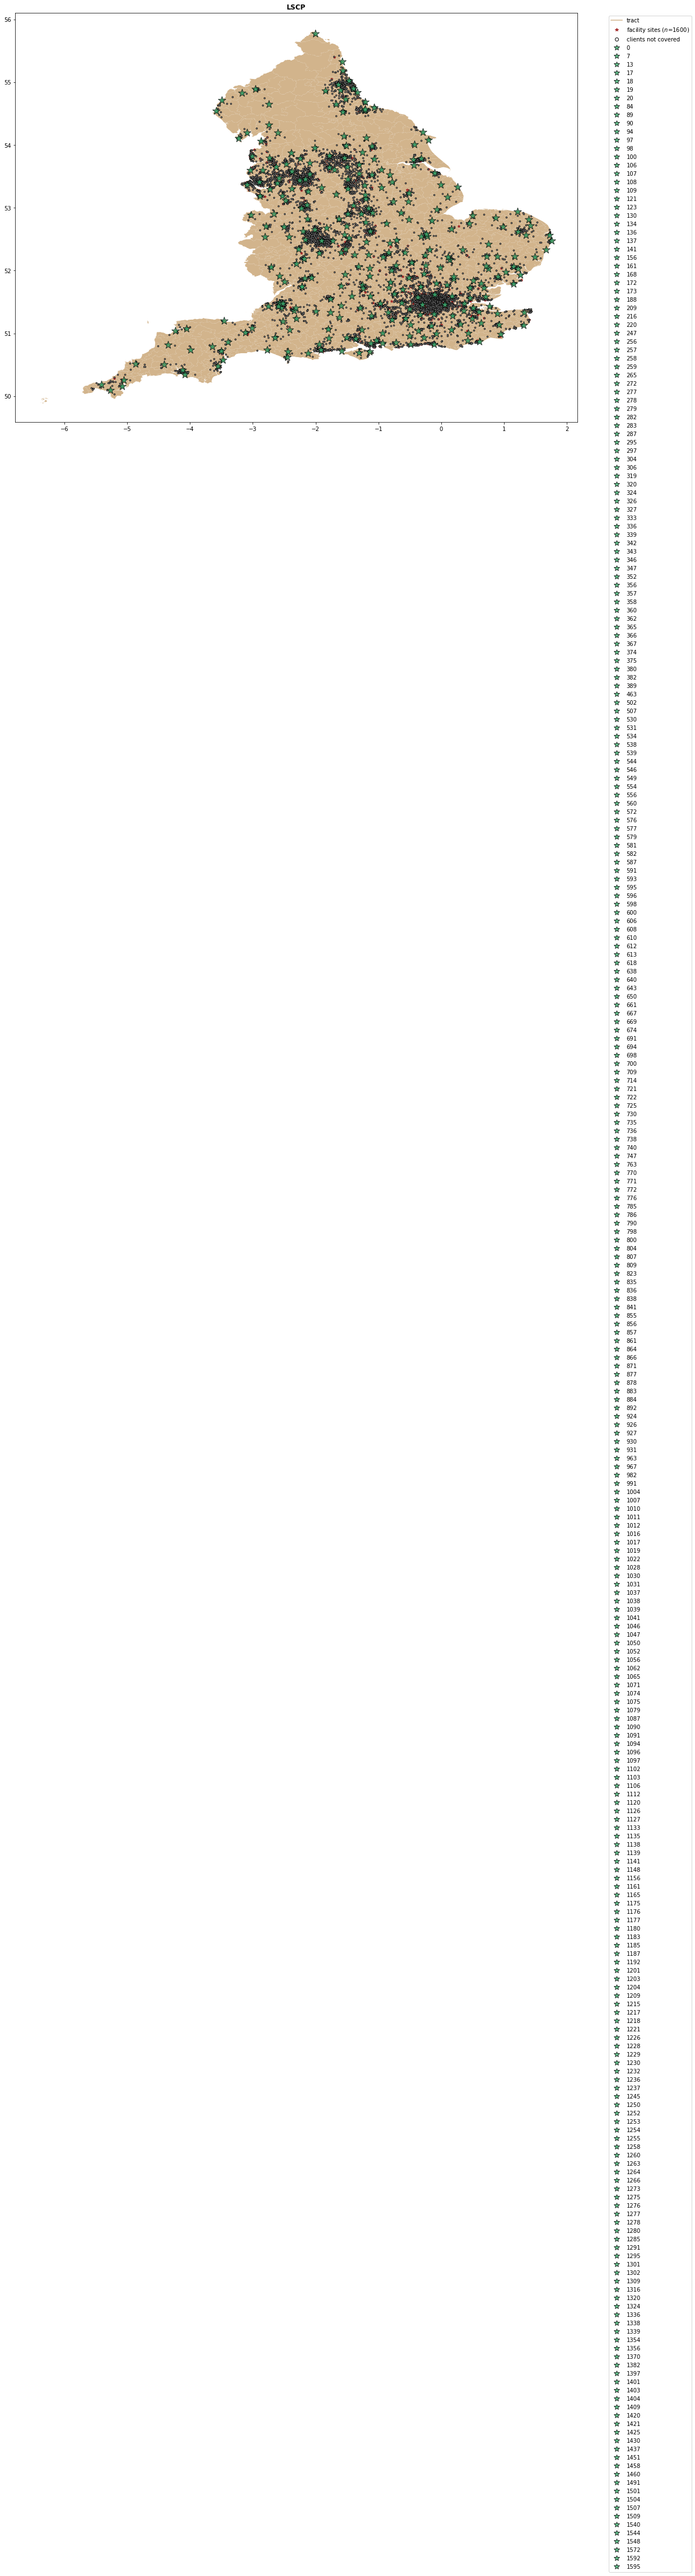

In [25]:
lscp = LSCP.from_cost_matrix(cost_matrix, service_dist)
lscp = lscp.solve(pulp.GLPK(msg=False))

lscp.facility_client_array()
plot_results(lscp, facility_points_gdf, demand_points_gdf, facility_points_gdf.shape[0], "LSCP")

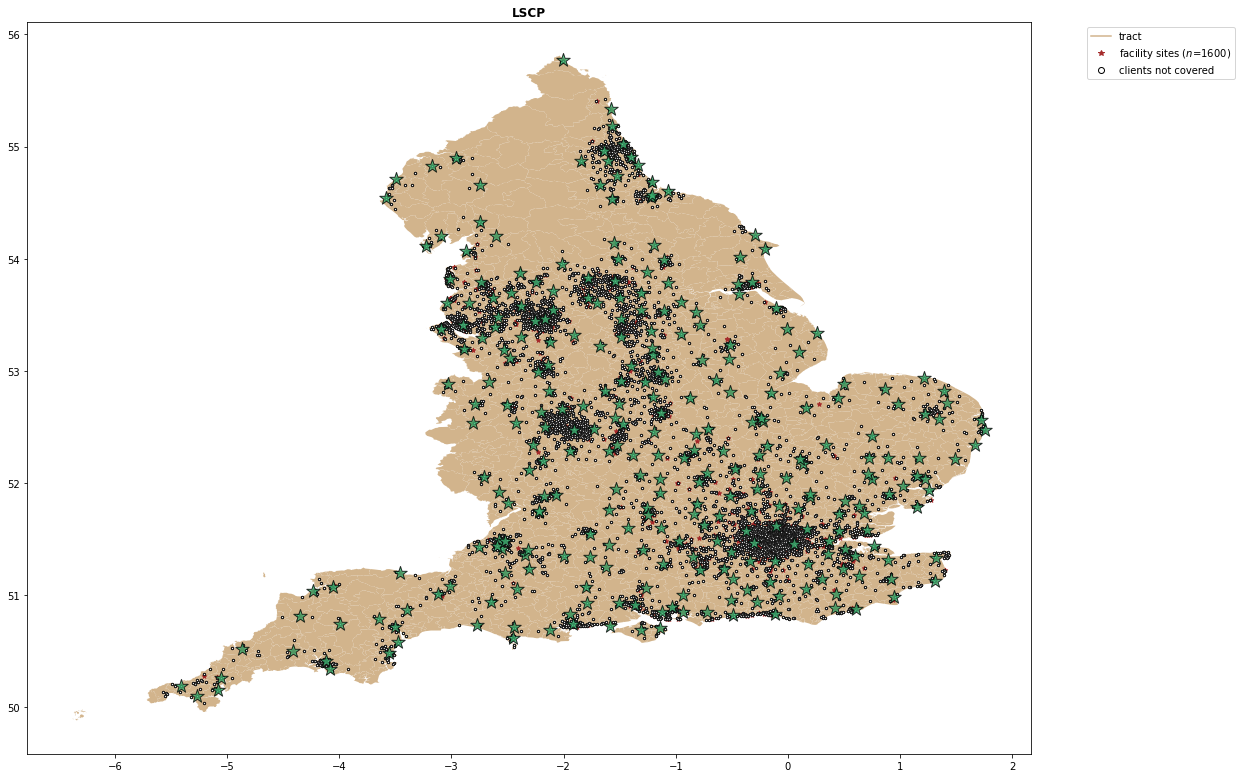

In [ ]:
plot_results(lscp, facility_points_gdf, demand_points_gdf, facility_points_gdf.shape[0], "LSCP")